In [1]:
import numpy as np
import pylab as plt
from scipy import signal as sg
from IPython.display import Audio, display
def play(x, fs):
    display(Audio(x, rate=fs))

plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150

## Базовые сигналы
### Еденичный испульс  (unit sample)
$\delta[n] = \begin{cases}
0, n\ne0,\\
1, n=0\\
\end{cases}$

Text(0, 0.5, 'x[n]')

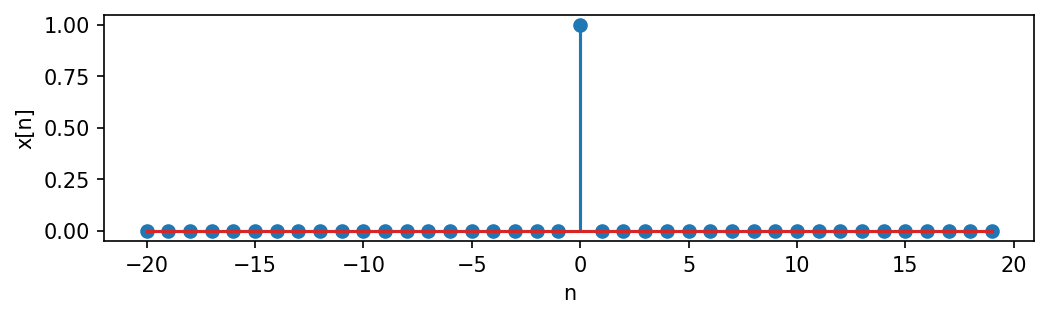

In [2]:
n = np.arange(-20, 20)
delta_n = (n==0).astype(int)

plt.stem(n, delta_n, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x[n]')

Операция сдвига:

$\delta[n-k] = \begin{cases} 0, n-k\ne0,\\ 1, n-k=0\\ \end{cases} = 
\begin{cases} 0, n\ne k,\\ 1, n=k\\ \end{cases}$

<StemContainer object of 3 artists>

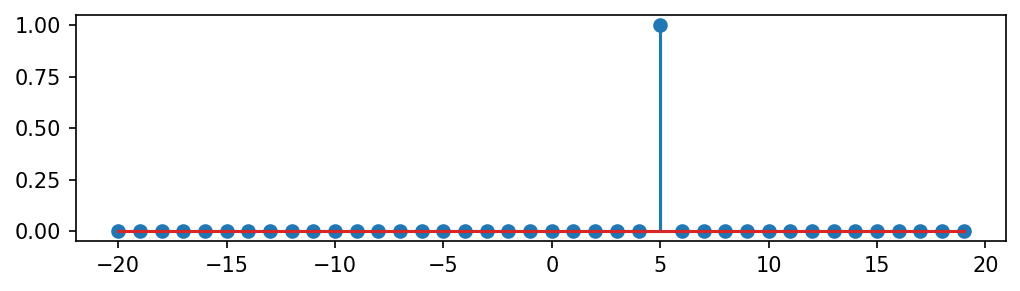

In [3]:
def delta_n_minus_k(k):
    return (n==k).astype(int)

plt.stem(n, delta_n_minus_k(5), use_line_collection=True)

Любую последовательность можно представить в виде суммы взвешенных еденичных импульсов:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

<StemContainer object of 3 artists>

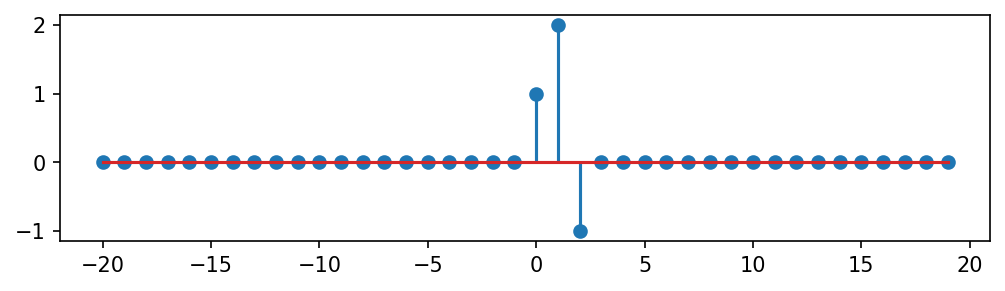

In [4]:
x_n = np.zeros(len(n))
x_n[(n>=0) & (n<3)] = [1, 2, -1]


plt.stem(n, x_n, use_line_collection=True)

<StemContainer object of 3 artists>

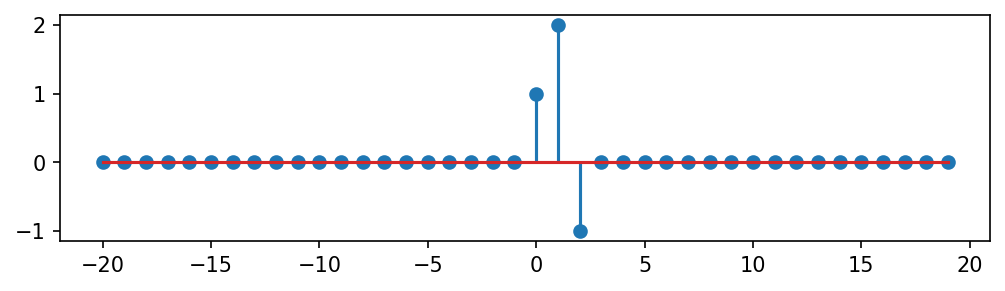

In [5]:
x2_n = np.array([x_n[n==k]*delta_n_minus_k(k) for k in n]).sum(0)


plt.stem(n, x2_n, use_line_collection=True)

### Еденичный скачок (unit step)

$u[n] = \begin{cases}
1, n\ge0,\\
0, n<0\\
\end{cases}$

Связь с еденичным испульсом:

$u[n] = \sum_{k=-\infty}^\infty u[k]\delta[n-k] = \sum_{k=0}^\infty \delta[n-k]$

Представление еденичного испульса через еденичные скачки:

$\delta[n] = u[n] - u[n-1]$

In [6]:
u_n = (n>=0).astype(int)
u_nm1 = (n-1>=0).astype(int)

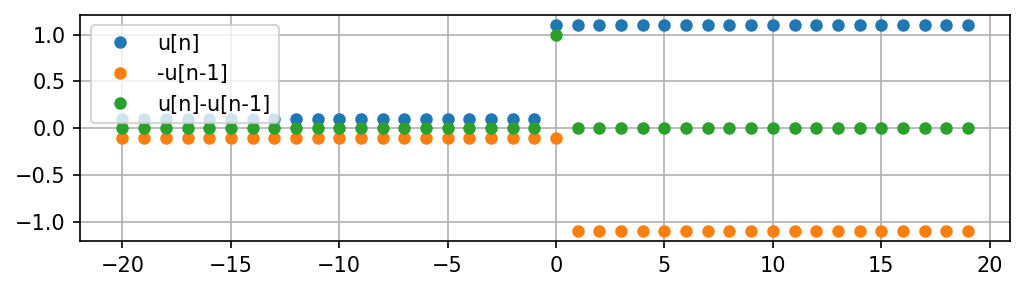

In [7]:
plt.plot(n, u_n+0.1, 'o', label='u[n]', markersize=5)
plt.plot(n, -u_nm1-0.1, 'o', label='-u[n-1]', markersize=5)
plt.plot(n, u_n-u_nm1, 'o', label='u[n]-u[n-1]', markersize=5)
plt.grid()
plt.legend(loc='upper left')

# Дискретные сигналы: продолжение
## Экспоненциальная последовательность

$x[n] = A\alpha^n$

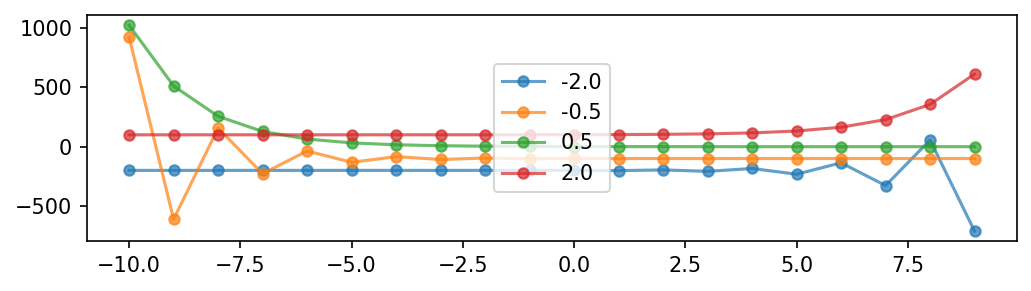

In [8]:
n = np.arange(-10, 10)
def exp_seq(alpha, A=1):
    return A*(alpha**n)




for j, alpha in enumerate([-2., -0.5, 0.5, 2.]):
    plt.plot(n, exp_seq(alpha)+j*100-200, 'o-',label=str(alpha), alpha=0.7, markersize=5)
    
plt.legend(loc=10)

$A=1$, $\alpha = e^{j2\pi/15}$

$x[n] = A\alpha^n = (e^{j2\pi/15})^n = e^{j2\pi n/15} = cos(2\pi n/15)+j\cdot sin(2\pi n/15)$

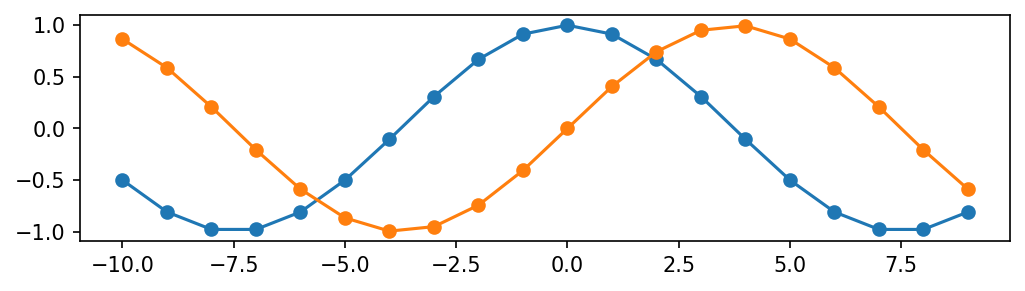

In [9]:
alpha = np.exp(2j*np.pi/15)

plt.plot(n, exp_seq(alpha).real, 'o-')
plt.plot(n, exp_seq(alpha).imag, 'o-')

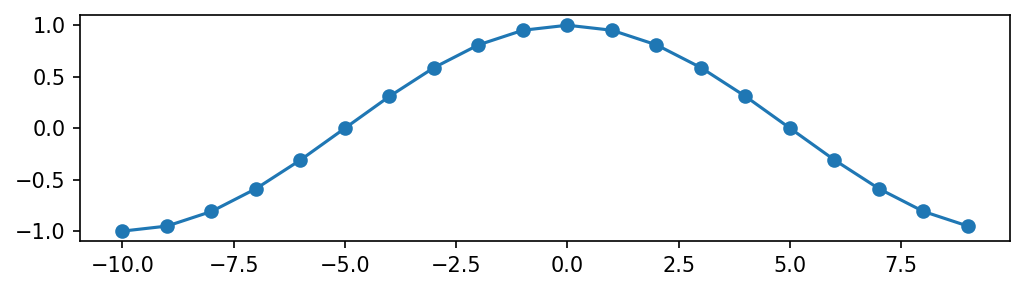

In [10]:
w_0 = 2*np.pi/20

plt.plot(n, np.cos(w_0*n), 'o-')

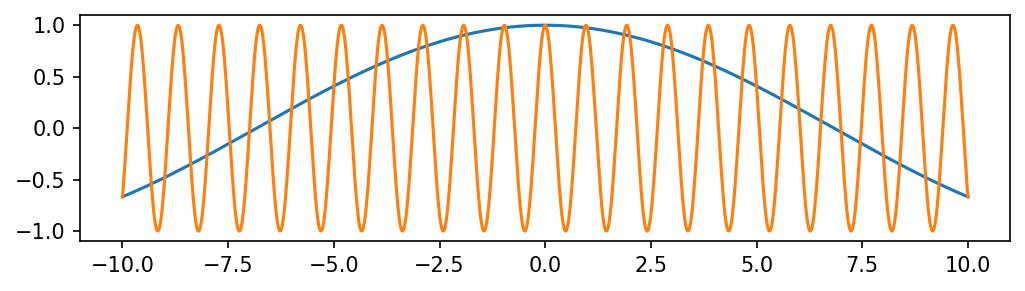

In [11]:
w_0 = 0.23
w_1 = w_0 + 2*np.pi

t = np.linspace(-10, 10, 1000)

plt.plot(t, np.cos(w_0*t), '-')
plt.plot(t, np.cos(w_1*t), '-')

#plt.xlim(-5, 5)

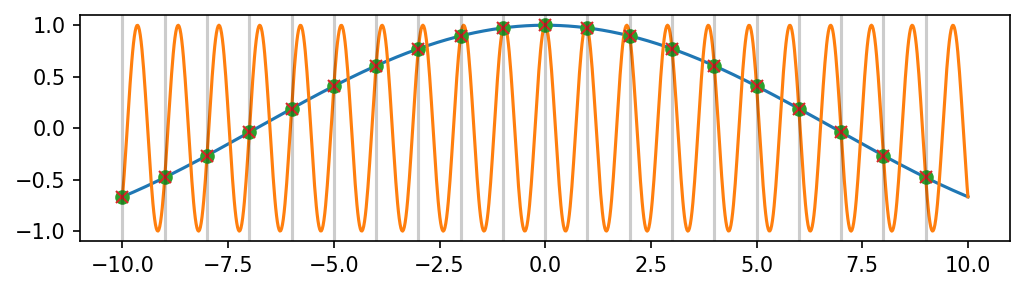

In [12]:
plt.plot(t, np.cos(w_0*t), '-')
plt.plot(t, np.cos(w_1*t), '-')


plt.plot(n, np.cos(w_0*n), 'o')
plt.plot(n, np.cos(w_1*n), 'x')
[plt.axvline(n0, color='k', alpha=0.2) for n0 in n]
#plt.xlim(-5, 5)
pass

$x[n] = cos(w_0n) = cos\big((w_0 +2\pi r)n\big)$ где $r\in Z$.

> Следовательно достаточно рассматривать $w_0$ только на диапазоне (-$\pi$, $\pi$]

## Свойств периодичности сигналов

Сигнал $x[n]$ назызается периодическим с периодом $N$ если:

$x[n] = x[n+N]$ для всех n

Для синусоидального сигнала:

$x[n] = cos(w_0n)$

$x[n+N] = cos(w_0n+w_0N)$

$w_0N = 2\pi k$, $k\in Z$

$N = 2\pi k/w_0$

Аналогично для экспоненциальной последовательности

### Примеры

Найти периоды:

$x_1[n] = cos(\pi/4 \cdot n)$


$x_2[n] = cos(3\pi/8 \cdot n)$

$x_3[n] = cos(n)$

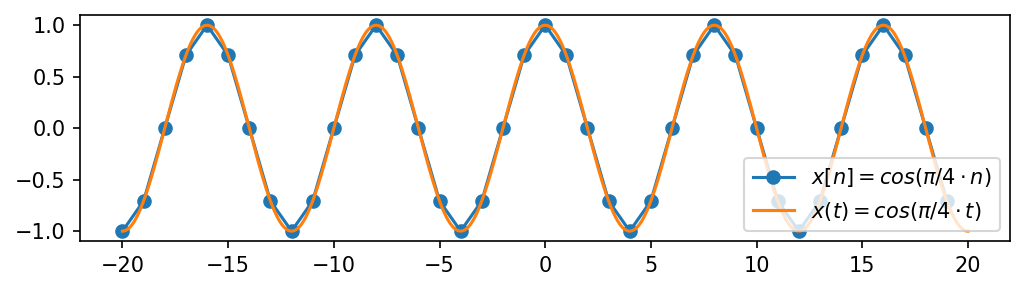

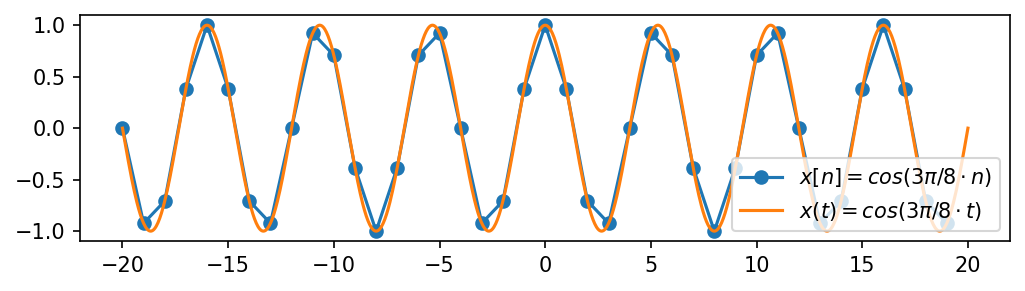

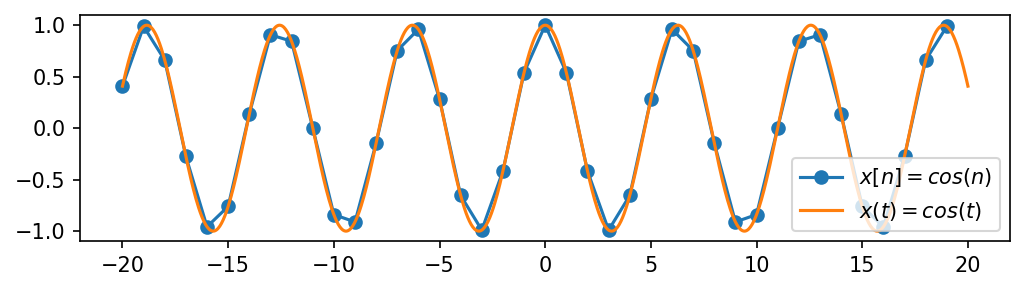

In [13]:
n = np.arange(-20, 20)
t = np.linspace(-20, 20, 1000)


plt.figure()
plt.plot(n, np.cos(np.pi/4*n), 'o-', label='$x[n] = cos(\pi/4 \cdot n)$')
plt.plot(t, np.cos(np.pi/4*t), '-', label='$x(t) = cos(\pi/4 \cdot t)$')
plt.legend(loc=4)
plt.show()

plt.figure()
plt.plot(n, np.cos(3*np.pi/8*n), 'o-', label='$x[n] = cos(3\pi/8 \cdot n)$')
plt.plot(t, np.cos(3*np.pi/8*t), '-', label='$x(t) = cos(3\pi/8 \cdot t)$')
plt.legend(loc=4)
plt.show()

plt.figure()

plt.plot(n, np.cos(1*n), 'o-', label='$x[n] = cos(n)$')
plt.plot(t, np.cos(t), '-', label='$x(t) = cos(t)$')
plt.legend(loc=4)
plt.show()

## Вопрос
Сколько всего уникальных дискретных синусоидальных сигналов типа $x[n]=cos(w_0n)$ c периодом N=4 отсчета?


> $w_0 = 2\pi k/N$, $k\in Z$

> $w_0 = k \cdot 2\pi/4$, $k\in Z$

>$w_0 = ~.., 0\cdot 2\pi/4, 1\cdot 2\pi/4, 2\cdot 2\pi/4, 3\cdot 2\pi/4, 4\cdot 2\pi/4, 5\cdot 2\pi/4, ..$

>$w_0 = ~.., 0, \pi/2, \pi, 3\pi/2, 2\pi, 5\pi/2, ...$

>$w_0 \in [0, \pi/2, \pi, 3\pi/2]$

In [14]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150



def f(w=0):
    plt.figure()
    n = np.arange(-4, 16+4)
    t = np.linspace(-4, 16+4, 1000)
    x = np.cos(w*np.pi*n)
    plt.plot(t, np.cos(w*np.pi*t))
    plt.plot(n, x, '.-', linewidth=0, color='k')
    if sum((x[:4]-x[4:8])**2)<1e-10:
        plt.plot(n[4:8], x[4:8], 'oC2')
        plt.plot(n[8:12], x[8:12], 'oC3')
    plt.ylim(-1.2, 1.2)
    [plt.axvline(v-0.5, color='k', linestyle='--', zorder=-1, alpha=0.4) for v in [0, 4, 8, 12, 16]]
    [plt.axvline(v, color='k', linestyle='-', zorder=-1, alpha=0.1) for v in n]
    plt.xlim(-1, 16)
    plt.legend(['$cos({:.1f}\pi n)$'.format(w)], loc=1)
    plt.show()
    
    

interactive_plot = interactive(f, w=(-1, 4, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='w', max=4.0, min=-1.0), Output(layout=Layout(height=…

# Дискретные сиcтемы

Система с дискретным временем $S$ - преобразование переводящее входной дискретный сигнал $x[n]$ в выходной сигнал $y[n]$:

$$y[n] = S(x[n])$$


## Идеальная система задержки
$$y[n] = I_d(x[n]) = x[n-d]$$

In [15]:
def ideal_delay_system(x, d):
    d = int(d)
    y = [(x[n-d] if n>d else 0) for n in range(len(x))]
    return np.array(y)

(1.0, 2756.0)

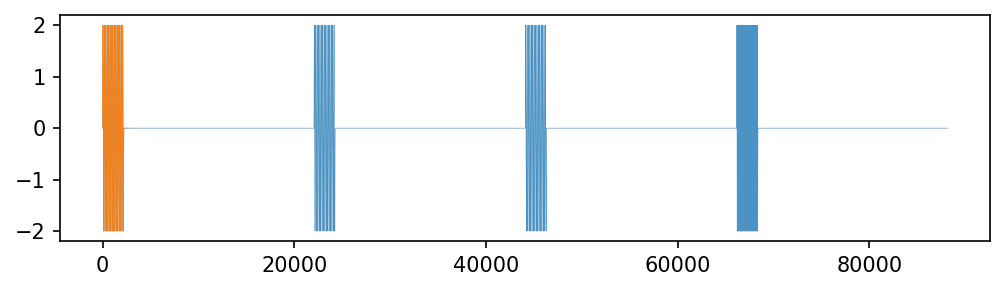

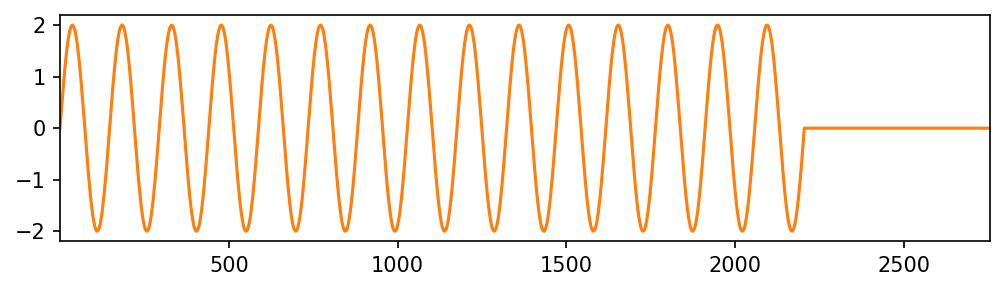

In [16]:
fs = 44100
n_samples = 2*fs
n = np.arange(n_samples)
t = n/fs
x = np.sin(2*np.pi*300*t)
x[(t>1.2)] = np.sin(2*np.pi*600*t[(t>1.2)])
#plt.axvline(n_samples/3.*4/fs)
x *= sg.square(2*np.pi*2*t, 1/10) + 1

plt.figure()
plt.plot(x, alpha=0.8, linewidth=0.3)
plt.plot(x[:fs//16], linewidth=0.3)

plt.figure()
plt.plot(x, 'C1')
play(x, fs)
plt.xlim(1, fs//16)

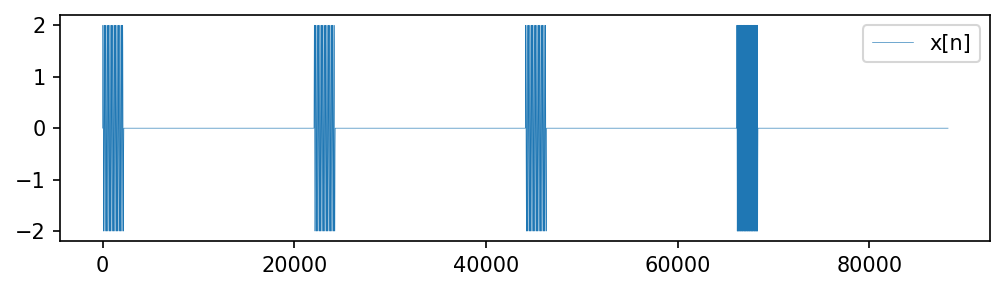

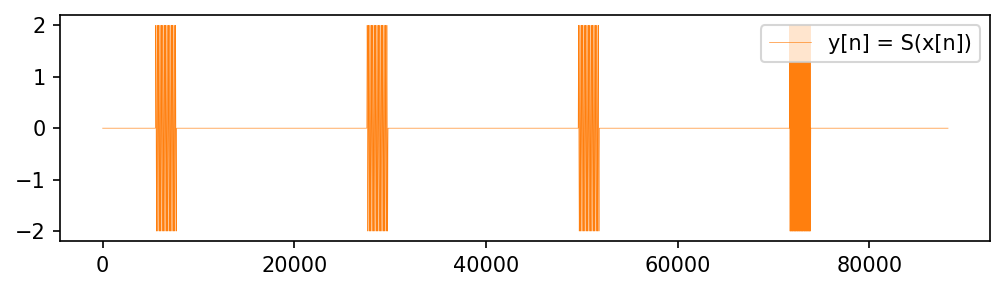

In [17]:
S = lambda x: ideal_delay_system(x, fs//8)
y = S(x)

plt.figure()
plt.plot(x, label='x[n]', linewidth=0.3)
plt.legend()


plt.figure()
plt.plot(y, 'C1', label='y[n] = S(x[n])', linewidth=0.3)
plt.legend()

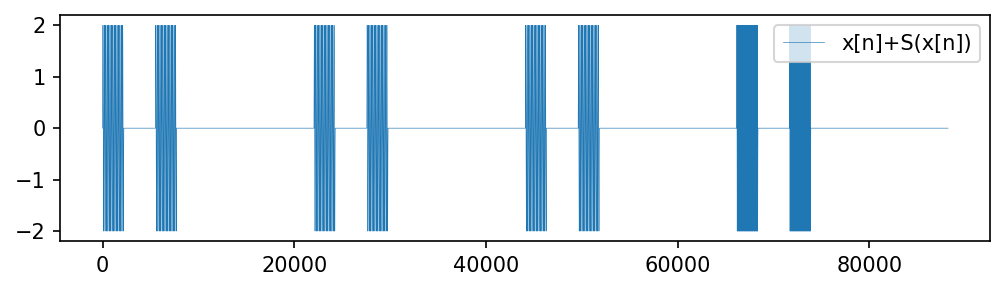

In [18]:
z = x + S(x)

plt.figure()
plt.plot(z, label='x[n]+S(x[n])', linewidth=0.3)
plt.legend()
play(z, fs)

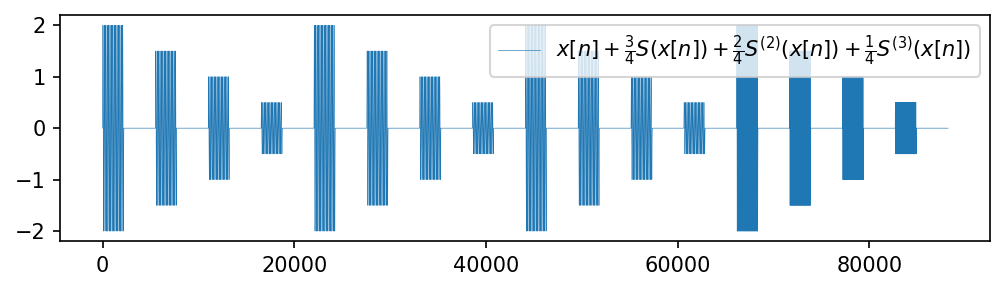

In [19]:
z = x + 3/4*S(x) + 1/2*S(S(x)) + 1/4*S(S(S(x)))

plt.figure()
plt.plot(z, label=r'$x[n]+ \frac{3}{4}S(x[n])+ \frac{2}{4}S^{(2)}(x[n])+\frac{1}{4}S^{(3)}(x[n])$', linewidth=0.3)
plt.legend()
play(z, fs)

### Скользящее среднее
$$y[n] = \frac{1}{M_l + M_R + 1}\sum_{k=-M_l}^{M_r}x[n-k]$$

In [20]:
def moving_average(x, ml, mr):
    n_samples = len(x)
    x = np.hstack([np.zeros(ml), x, np.zeros(mr)])
    y = [sum([x[n-k] for k in range(-ml, mr+1)]) for n in range(ml, len(x)-mr)]
    return np.array(y)/(1+ml+mr)

(1.0, 2756.0)

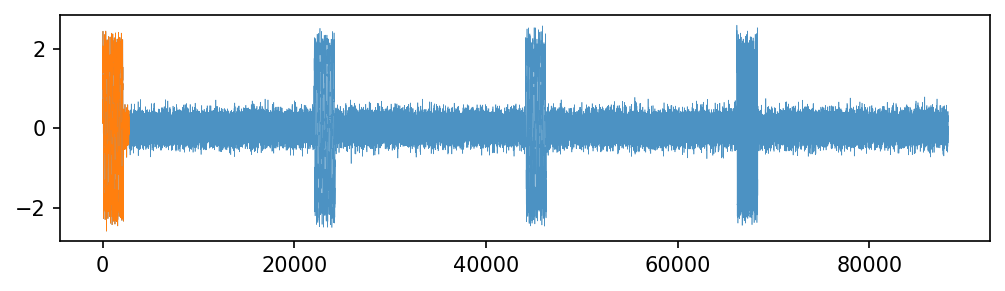

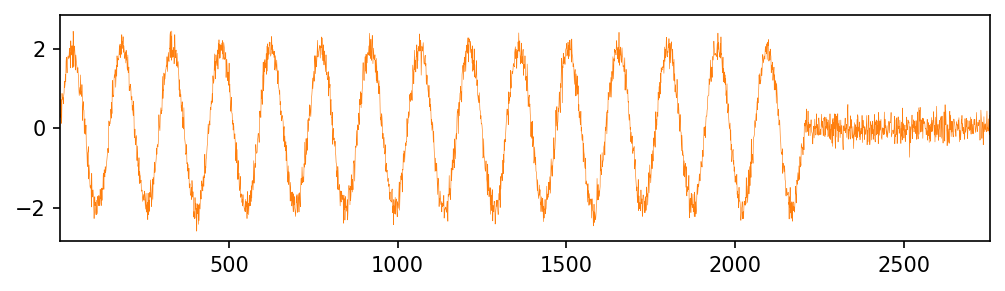

In [21]:
noise = np.random.normal(scale=0.2, size=n_samples)
#noise = np.sin(2*np.pi*900*t)
x_bad = x + noise

plt.figure()
plt.plot(x_bad, alpha=0.8, linewidth=0.3)
plt.plot(x_bad[:fs//16], linewidth=0.3)

plt.figure()
plt.plot(x_bad, 'C1', linewidth=0.3)
play(x_bad, fs)
plt.xlim(1, fs//16)

(1.0, 2756.25)

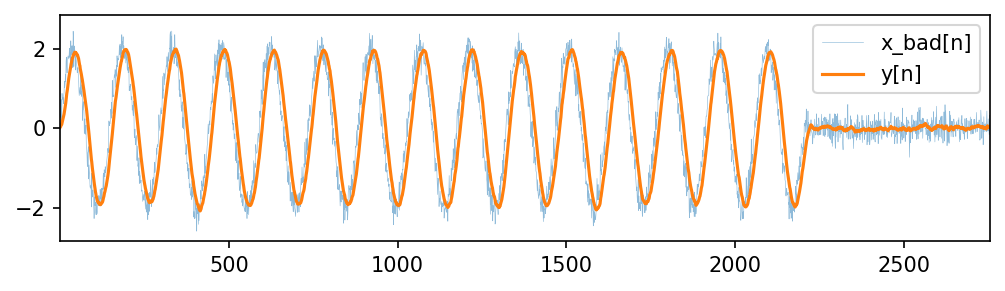

In [22]:
y = moving_average(x_bad, 0, 20)

plt.figure()
plt.plot(x_bad, label='x_bad[n]', alpha=0.5, linewidth=0.3)
plt.plot(y, label='y[n]')
plt.legend()
play(y, fs)
plt.xlim(1, fs/16)

## Линейные системы
Система $S$ называется линейной если: 
$$S(a_1x_1[n] + a_2x_2[n]) = a_1S(x_1[n]) + a_2S(x_2[n])$$

Какие из следующих систем являются линейными?
1. $y[n] = x[n-n_d]$

1. $y[n] = x[n] + 1$

2. $y[n] = \frac{1}{M_l + M_R + 1}\sum_{k=-M_l}^{M_r}x[n-k]$

3. $y[n] = x^2[n]$

### Примеры
#### Сумматор (является линейной системой):

$y[n] = \sum_{k=-\infty}^{n}x[k]$


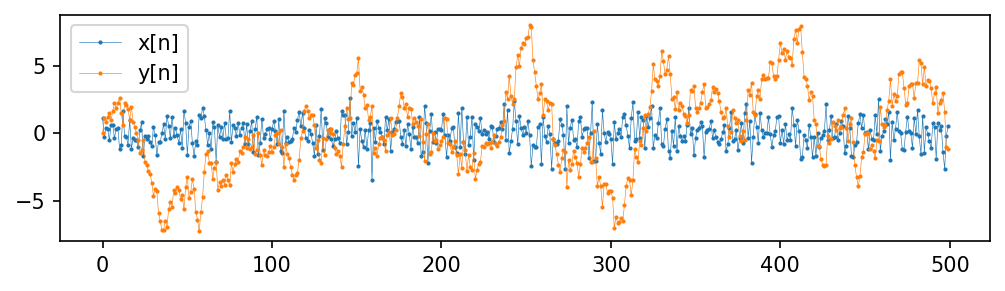

In [23]:
def accumulator(x):
    y = [sum(x[:n]) for n in range(len(x))]
    return np.array(y)

x = np.random.normal(size=500)
y = accumulator(x)

plt.figure()
plt.plot(x, '.-', label='x[n]', linewidth=0.3, markersize=2)
plt.plot(y, '.-', label='y[n]', linewidth=0.3, markersize=2)
plt.legend()

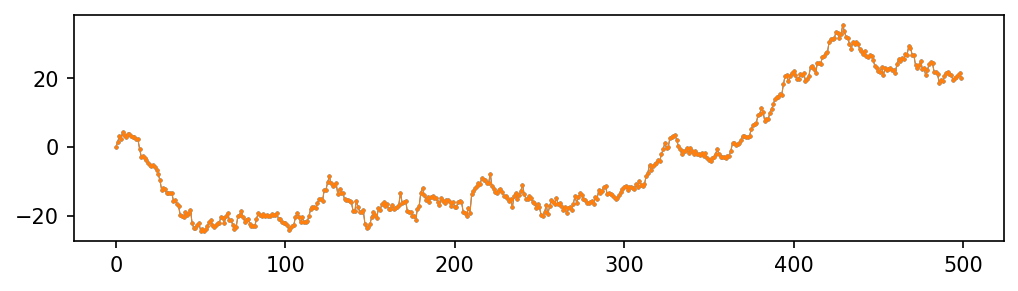

In [24]:
np.random.seed(42)
x1 = np.random.normal(size=500)
x2 = np.random.normal(size=500)
plt.plot(accumulator(x1) + accumulator(x2), '.-', label='y(x1[n]) + y(x2[n])', linewidth=0.5, markersize=2)
plt.plot(accumulator(x1+x2), '.-', label='y(x1[n]) + y(x2[n])', linewidth=0.5, markersize=2)

#### Логарифм  (не является линейной системой):

$y[n] = log_{10}(|x[n]|+0.00001)$

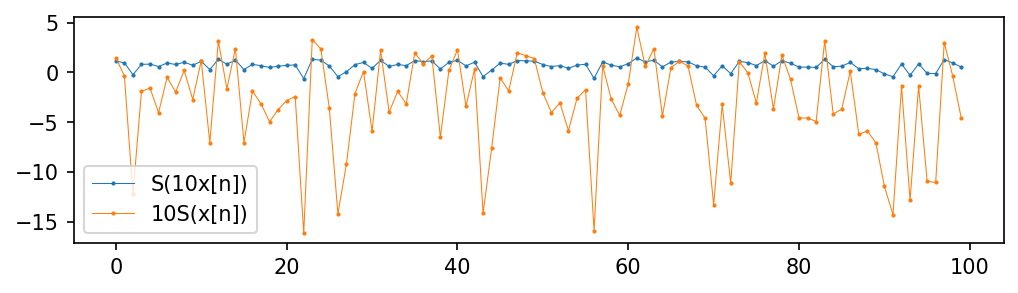

In [25]:
def log10(x):
    y = np.log10(np.abs(x)+0.00001)
    return np.array(y)

x = np.random.normal(size=100)
#plt.plot(x, '.-', alpha=0.3, label='x[n]')

plt.figure()
plt.plot(log10(10*x), '.-', label='S(10x[n])', linewidth=0.5, markersize=2)
plt.plot(10*log10(x), '.-', label='10S(x[n])', linewidth=0.5, markersize=2)
plt.legend()

### Стационарность
$y[n] = S(x[n])$

$S(x[n-n_0]) = y[n-n_0]$, $\forall n_0: -\infty < n_0 < \infty$

#### Стационарность сумматора:

$y[n] = \sum_{k=-\infty}^{n}x[k]$

$y[n-n_0] = \sum_{k=-\infty}^{n-n0}x[k] = \sum_{k'=-\infty}^{n}x[k'-n_0] = S(x[n - n_0])$

$k' = k + n_0$

Для верхней границы суммы $k=n - n_0$, $k'=n$

#### Уплотнитель:
$ y[n] = S(x[n]) = x[2n]$

Let $k=2n$:

$~~~y[n] = x[k]$

$~~~y[n-n_0] = x[k-n_0] = \color{red}{x[2n-n_0]}$

Let $l=n-n_0$:

$~~~S(x[n-n_0]) = S(x[l]) = x[2l] = \color{red}{x[2(n - n_0)]}$



### Каузальность
$y[n] = S(x[n]) = f(x[n], x[n-1], x[n-2], ...)$


Примеры:

$S_1$: $y[n] = x[n+1] - x[n]$

$S_2$: $y[n] = x[n] - x[n-1]$

### Устойчивость

$|x[n]| \le B_x <\infty$ $\forall n $

$|y[n]| \le B_y <\infty$ $\forall n $


Примеры:
1. $y[n] = x^2[n]$
2. $y[n] = \sum_{k=-\infty}^{n}x[k]$

(-10.0, 10.0)

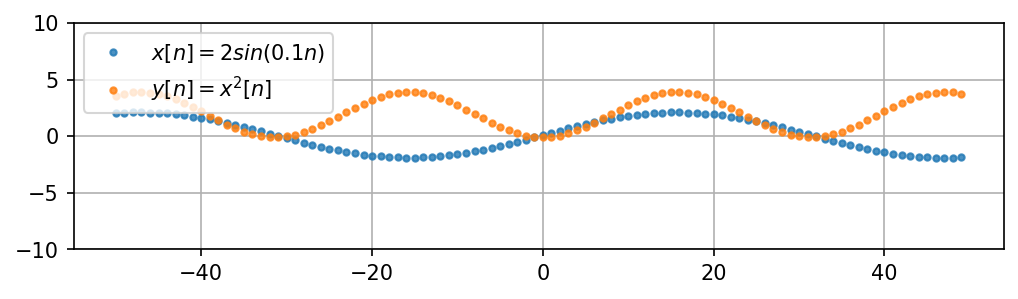

In [26]:
n = np.arange(-50, 50)
x = 2*np.sin(n/10)
y = x**2

plt.plot(n, x+0.1, '.', alpha=0.8, label='$x[n] = 2sin(0.1n)$')
plt.plot(n, y-0.1, '.', alpha=0.8, label='$y[n] = x^2[n]$')
plt.legend(loc=2)
plt.grid()
plt.ylim(-10, 10)

(-1.0, 10.0)

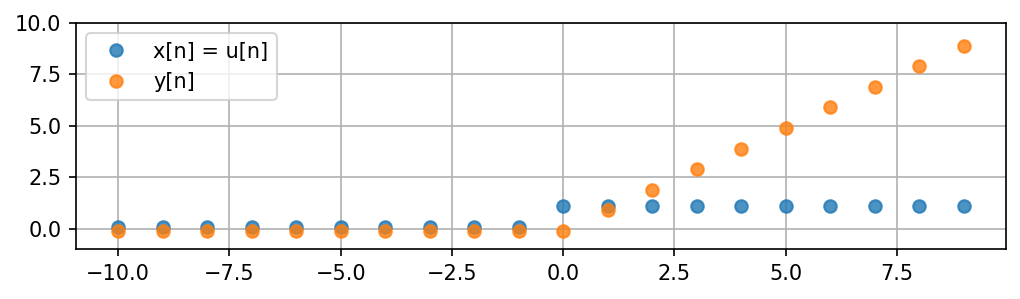

In [27]:
n = np.arange(-10, 10)
x = (n >= 0).astype(int)
y = accumulator(x)

plt.plot(n, x+0.1, 'o', alpha=0.8, label='x[n] = u[n]')
plt.plot(n, y-0.1, 'o', alpha=0.8, label='y[n]')
plt.legend(loc=2)
plt.grid()
plt.ylim(-1, 10)

### Линейная стационарная система
Система $S$ называется линейной стационарная системой (LTI) если:
1. $S(a_1x_1[n] + a_2x_2[n]) = a_1S(x_1[n]) + a_2S(x_2[n])$
2. $y[n] = S(x[n]) \Rightarrow S(x[n-n_0]) = y[n-n_0]$, $\forall n_0: -\infty < n_0 < \infty$

Напоминание:

$x[n] = \sum_{k=-\infty}^\infty x[k]\delta[n-k]$

Пусть $S$ - LTI. Тогда:

$y[n] = S(x[n]) = S\Big(\sum_{k=-\infty}^\infty x[k]\delta[n-k]\Big) = $

$ = \sum_{k=-\infty}^\infty x[k]S(\delta[n-k]) = $

$ = \sum_{k=-\infty}^\infty x[k]h[n-k]$

Свертка:

$ y[n] = x[n]*h[n]$

$h[n]$ - *импульсная характеристика системы*

In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

In [31]:
import numpy as np
import pylab as plt
import sounddevice as sd
from scipy import signal as sg
import seaborn as sns
from ipywidgets import interactive

plt.rcParams["figure.figsize"] = (8,2)
plt.rcParams["figure.dpi"] = 150
plt.rcParams['axes.grid'] = True 

In [32]:
def pad(domain, n, domain_start=0):
    x = np.zeros(len(n))
    start = np.where(n==domain_start)[0][0]
    x[start:start+len(domain)] = domain
    return x

def pad_reverse_and_shift(domain, n, shift=0, domain_start=0):
    x = np.zeros(len(n))
    start = np.where(n==domain_start)[0][0]
    x[start-len(domain)+1+shift:start+1+shift] = domain[::-1]
    return x
        
    

n = np.arange(-5, 10)
x_domain = [-1, -0.5, 0, 0.5, 1]
h_domain = [1, -1]


def plot_conv(m=-3):
    x = pad(x_domain, n)
    h = pad(h_domain, n)
    h_nmk = pad_reverse_and_shift(h_domain, n, m)
    y = np.convolve(pad(x_domain, n), h_domain, 'same')

    fig, axes = plt.subplots(3, figsize=(8, 6), sharex='all', sharey='all')
    axes[1].plot(n+0.05, x, 'oC0', label='$x[k]$')
    axes[0].plot(n+0.05, x, 'oC0', label='$x[n]$')
    axes[0].plot(n-0.05, h, 'oC1', label='$h[n]$')
    axes[1].plot(n-0.05, h_nmk, 'oC3', label='$h[{}-k]$'.format(m))
    axes[1].plot(n, h_nmk*x, 'xk', label='$x[k]\cdot h[{}-k]$'.format(m), markersize=4)
    axes[2].plot(n, y, 'oC2', label='$y[n]$')
    axes[2].plot(m, sum(x*h_nmk), 'xC3', label='$y[{}]$'.format(m), markersize=10)
    axes[0].legend(loc=4), axes[1].legend(loc=4), axes[2].legend(loc=4) 
    [ax.axvline(m, zorder=-100, color='k', alpha=0.5, linestyle='--') for ax in axes]
    sns.despine()
    plt.show()


interactive_plot = interactive(plot_conv, m=(-3, 7, 1))
output = interactive_plot.children[-2]
interactive_plot

interactive(children=(IntSlider(value=-3, description='m', max=7, min=-3), Output()), _dom_classes=('widget-in…